In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install bertopic

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Ячейка обязательная, если запускать в коллабе, чтобы файле сохранились на диске
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ria = pd.read_csv('preprocessed-ria.csv')

In [5]:
ria_timestamps = ria.date.to_list()
ria['result_clean_text'] = ria['result_clean_text'].astype(str)
ria_posts = ria.result_clean_text.to_list()

In [6]:
from bertopic import BERTopic

topic_model = BERTopic(language="russian", verbose=True)
topics, probs = topic_model.fit_transform(ria_posts)

c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-19 04:49:43,562 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 2511/2511 [1:03:49<00:00,  1.52s/it] 
2024-05-19 05:53:39,664 - BERTopic - Embedding - Completed ✓
2024-05-19 05:53:39,665 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-19 05:54:26,878 - BERTopic - Dimensionality - Completed ✓
2024-05-19 05:54:26,912 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-19 05:54:30,836 - BERTopic - Cluster - Completed ✓
2024-05-19 05:54:30,859 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-19 05:54:36,099 - BERTopic - Representation - Completed ✓


In [7]:
topic_model.save("ria_model")

2024-05-19 05:54:40,001 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.
c:\Users\Abina Kukanova\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [8]:
topics_over_time = topic_model.topics_over_time(ria_posts, ria_timestamps, datetime_format="mixed", nr_bins=20)

20it [00:39,  1.96s/it]


In [9]:
topics_over_time = topic_model.topics_over_time(ria_posts, ria_timestamps,
                                                datetime_format="mixed",
                                                global_tuning=True, evolution_tuning=True, nr_bins=20)

20it [00:38,  1.94s/it]


In [10]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [11]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5])

In [12]:
topics_over_time["Year"] = topics_over_time["Timestamp"].astype(str).str[:4].astype(int)

In [20]:
selected_topics = topics_over_time[topics_over_time['Topic'] > 0]

In [21]:
topic_counts = selected_topics.groupby("Name")["Frequency"].sum()

# Выбор топ-20 тем
top_20_topics = topic_counts.nlargest(20).index

grouped_lenta = selected_topics.groupby(["Year", "Name"])["Frequency"].sum().unstack(fill_value=0)

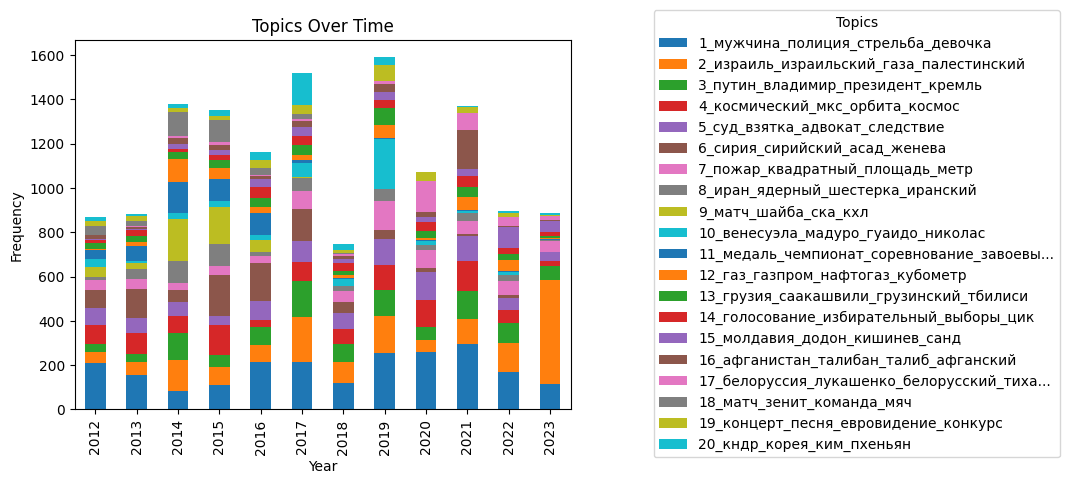

In [22]:
# Фильтрация данных по топ-20 темам
filtered_data = grouped_lenta[top_20_topics]

# Построение графика
filtered_data.plot(kind="bar", stacked=True)

plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Topics Over Time")
plt.legend(title="Topics", loc="upper right", bbox_to_anchor=(2, 1.1))
plt.savefig("Ria_BERTopic-DTM.eps", format='pdf', dpi=1000,
                    bbox_inches='tight', pad_inches=0)
#plt.show()